## Project: Titanic Data Investigation

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this contest, we ask you to complete the analysis of what sorts of people were likely to survive.

- Dataset: Titantic
- Question: What sorts of people were likely to survive?


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

/Users/apple/anaconda/envs/py2Udacity/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [22]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv'
df = pd.read_csv(url,index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Wrangling Phase

#### Data Type examinaiton

In [24]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [25]:
df.shape

(891, 11)

#### Missing Value

In [36]:
#check the number of missing value in each variables
pd.isnull(df).sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
#Check the cabin distribution to see if it contains info

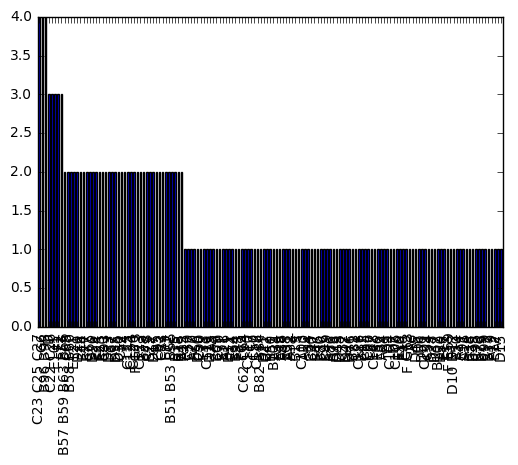

In [243]:
df['Cabin'].value_counts().plot(kind='bar')

In [240]:
df.groupby('Survived')['Cabin'].value_counts()

Survived  Cabin      
0         C124           2
          C22 C26        2
          C23 C25 C27    2
          D26            2
          F G73          2
          G6             2
          A10            1
          A14            1
          A19            1
          A24            1
          A32            1
          A36            1
          A5             1
          A7             1
          B102           1
          B19            1
          B22            1
          B30            1
          B37            1
          B38            1
          B51 B53 B55    1
          B58 B60        1
          B71            1
          B82 B84        1
          B86            1
          B94            1
          C110           1
          C111           1
          C118           1
          C123           1
                        ..
1         C78            1
          C83            1
          C85            1
          C90            1
          C99            1
      

In [247]:
df = df.drop(['Cabin'], axis=1) 

In [248]:

df.shape

(891, 10)

In [263]:
#remove the nan value
df = df.dropna()

### Data Exploration Phase

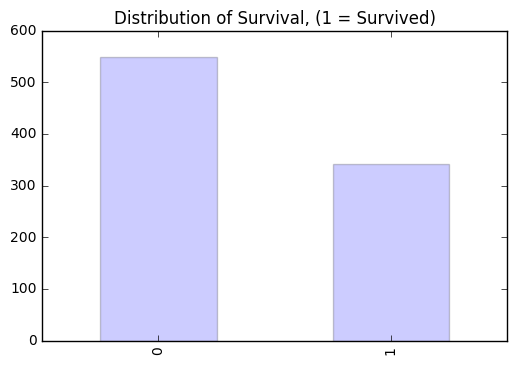

In [45]:
df['Survived'].value_counts().plot(kind='bar', alpha=0.2)
plt.title("Distribution of Survival, (1 = Survived)")    

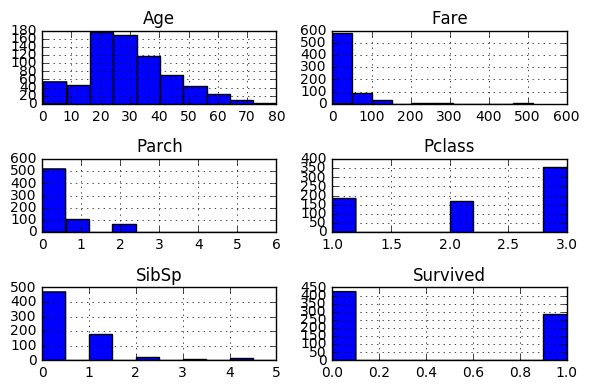

In [284]:
df.hist()
plt.tight_layout()

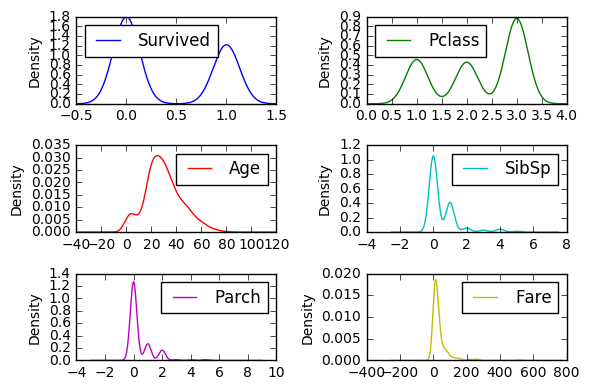

In [291]:
df.plot(kind='density', subplots=True, layout=(3,2), sharex=False)
plt.tight_layout()

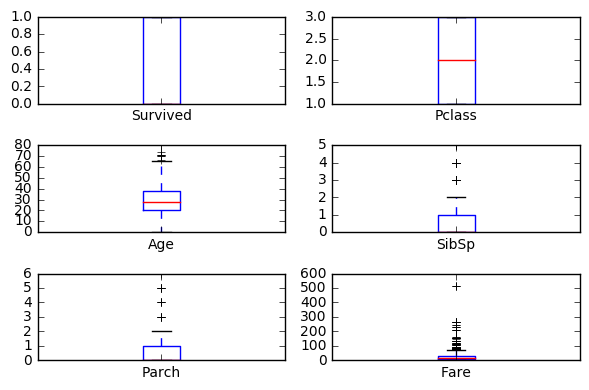

In [293]:
df.plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False)
plt.tight_layout()

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.356462 -0.082446 -0.015523  0.095265  0.266100
Pclass   -0.356462  1.000000 -0.365902  0.065187  0.023666 -0.552893
Age      -0.082446 -0.365902  1.000000 -0.307351 -0.187896  0.093143
SibSp    -0.015523  0.065187 -0.307351  1.000000  0.383338  0.139860
Parch     0.095265  0.023666 -0.187896  0.383338  1.000000  0.206624
Fare      0.266100 -0.552893  0.093143  0.139860  0.206624  1.000000


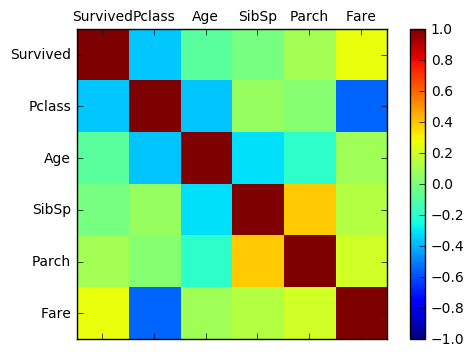

In [314]:
correlations = df.corr()
names=correlations.columns.values
print correlations
#ticks = np.arange(0,5,1)
#print ticks
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

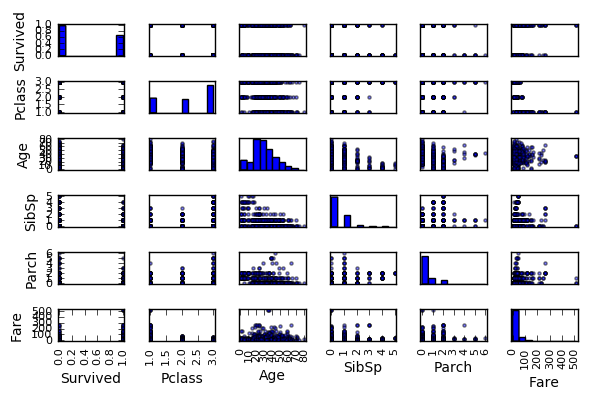

In [301]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df)
plt.tight_layout()
plt.show()

### Age & Survival

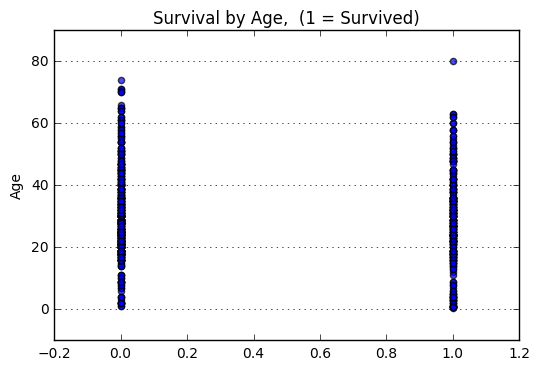

In [132]:
plt.scatter(df.Survived, df.Age, alpha=0.7)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = Survived)")

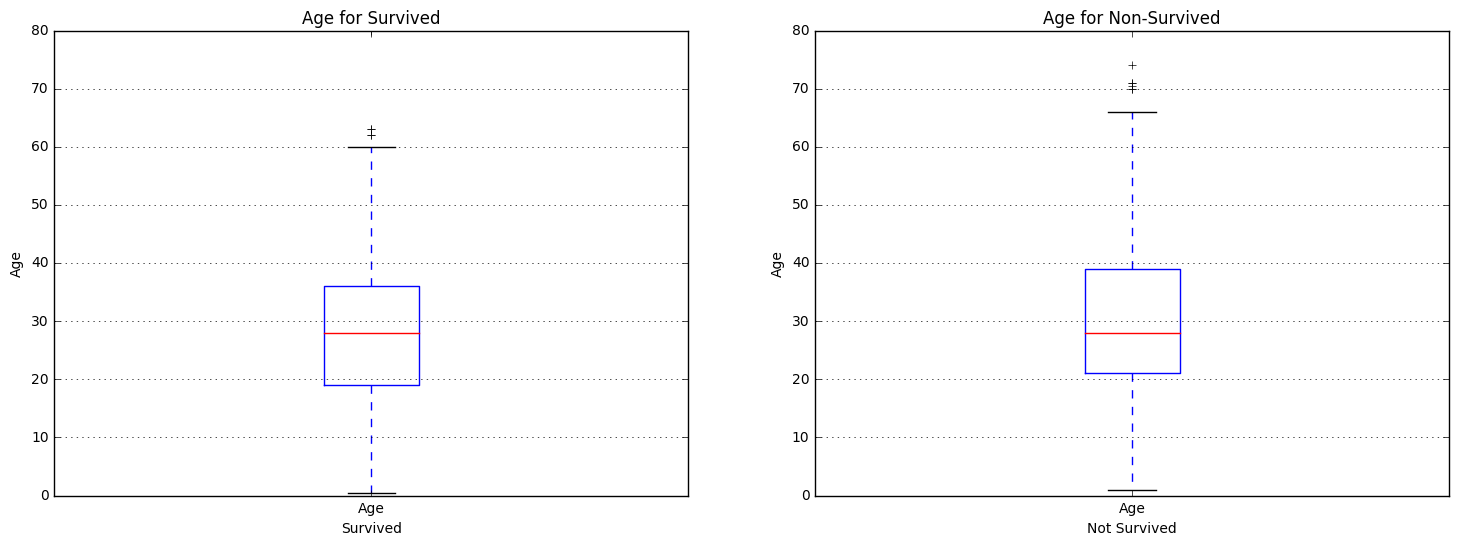

In [184]:
fig = plt.figure(figsize=(18,6))

ax1 = fig.add_subplot(121)
df[df['Survived']==1]['Age'].plot(kind='box')
plt.ylabel("Age")
plt.xlabel("Survived")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Age for Survived")

ax2 = fig.add_subplot(122)
df[df['Survived']==0]['Age'].plot(kind='box')
plt.ylabel("Age")
plt.xlabel("Not Survived")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Age for Non-Survived")

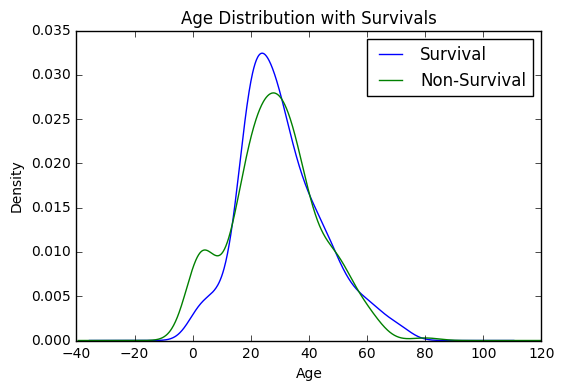

In [238]:
df.Age[df.Survived == 0].plot(kind='kde')    
df.Age[df.Survived == 1].plot(kind='kde')
plt.xlabel("Age")    
plt.title("Age Distribution with Survivals")
# sets our legend for our graph.
plt.legend(('Survival', 'Non-Survival'),loc='best') 

### Class Distribution & Survival

In [232]:
df.groupby('Survived')['Pclass'].value_counts()

Survived  Pclass
0         3         372
          2          97
          1          80
1         1         136
          3         119
          2          87
Name: Pclass, dtype: int64

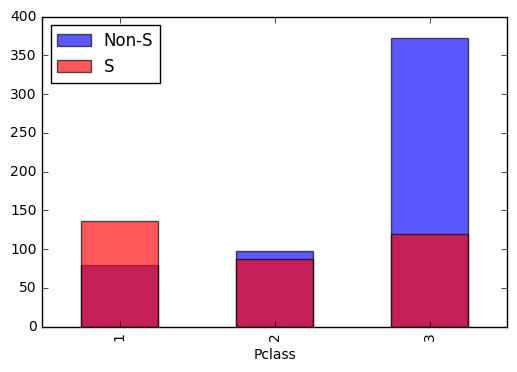

In [235]:
df.groupby('Survived')['Pclass'].value_counts()[0].sort_index().plot(kind='bar',color='blue',label='Non-S',alpha=0.65)
df.groupby('Survived')['Pclass'].value_counts()[1].sort_index().plot(kind='bar',color='red',label='S',alpha=0.65,stacked=True)
plt.legend(loc='best')

### Age Distribution within Class

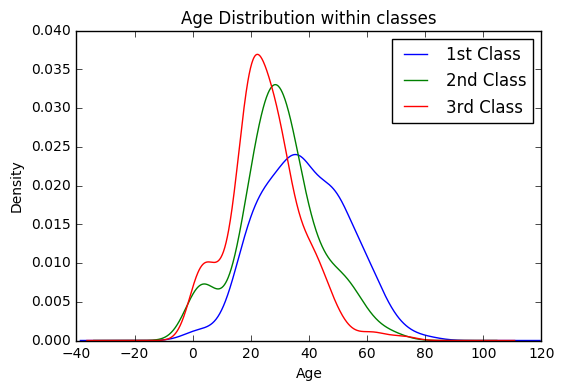

In [236]:
df.Age[df.Pclass == 1].plot(kind='kde')    
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

### Survival with Embark location

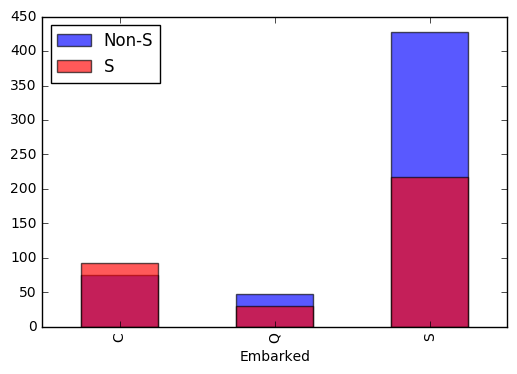

In [251]:
df.groupby('Survived')['Embarked'].value_counts()[0].sort_index().plot(kind='bar',color='blue',label='Non-S',alpha=0.65)
df.groupby('Survived')['Embarked'].value_counts()[1].sort_index().plot(kind='bar',color='red',label='S',alpha=0.65,stacked=True)
plt.legend(loc='best')

### Gender & Survival

0    468
1    109
Name: Survived, dtype: int64
0     81
1    233
Name: Survived, dtype: int64


(-1, 2)

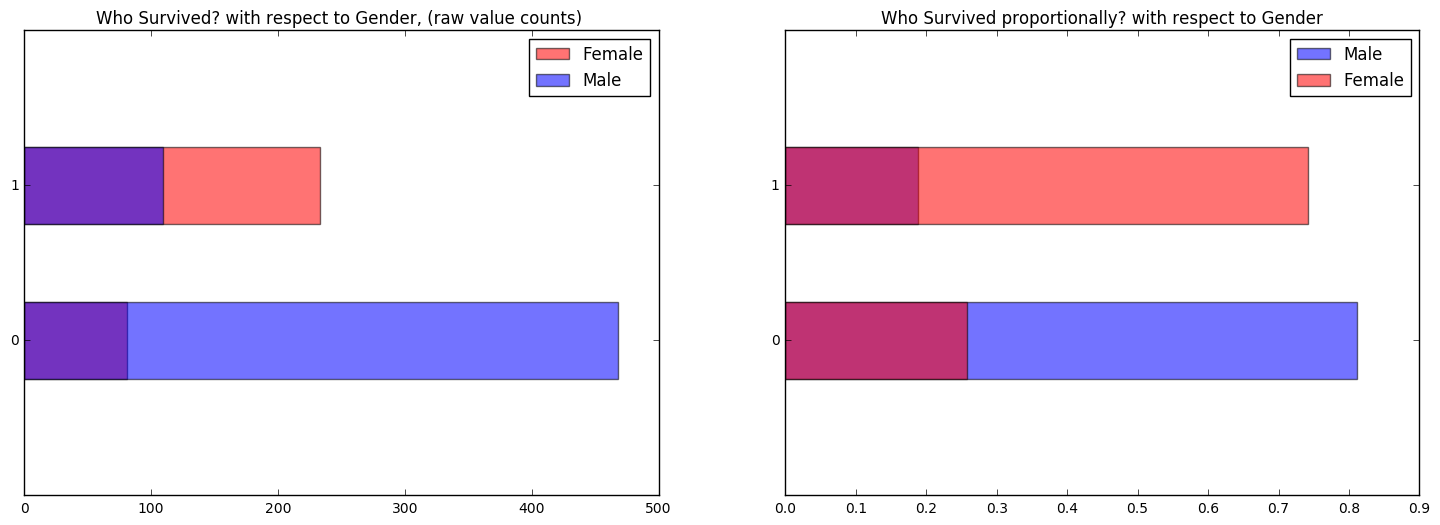

In [255]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(121)
df_male = df.Survived[df.Sex == 'male'].value_counts().sort_index()
df_female = df.Survived[df.Sex == 'female'].value_counts().sort_index()
print df_male
print df_female

df_female.plot(kind='barh',label='Female', color='red',alpha=0.55)
df_male.plot(kind='barh',label='Male',color='blue',alpha=0.55)

plt.title("Who Survived? with respect to Gender, (raw value counts) "); plt.legend(loc='best')
ax1.set_ylim(-1, 2) 

#adjust graph to display the proportions of survival by gender
ax2 = fig.add_subplot(122)
(df_male/float(df_male.sum())).plot(kind='barh',label='Male', color='blue',alpha=0.55)  
(df_female/float(df_female.sum())).plot(kind='barh', color='red',label='Female', alpha=0.55)
plt.title("Who Survived proportionally? with respect to Gender"); plt.legend(loc='best')

ax2.set_ylim(-1, 2)

In [68]:
df1_1=df1[df1['Sex']=='female']
df1_1
df1_2=df1[df1['Sex']=='male']
df1_2

,Survived,Sex,Name
1,0,male,468
3,1,male,109


### As female has a higher survival rate than male, how it acctually distributes in each class?

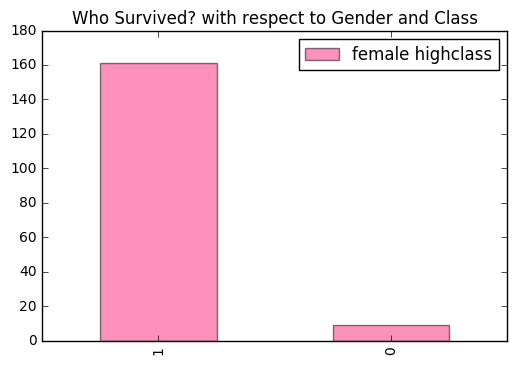

In [257]:
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female highclass', color='#FA2479', alpha=0.5)
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

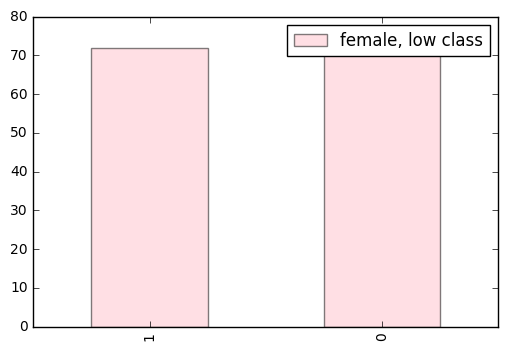

In [259]:
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=0.5)
plt.legend(loc='best')

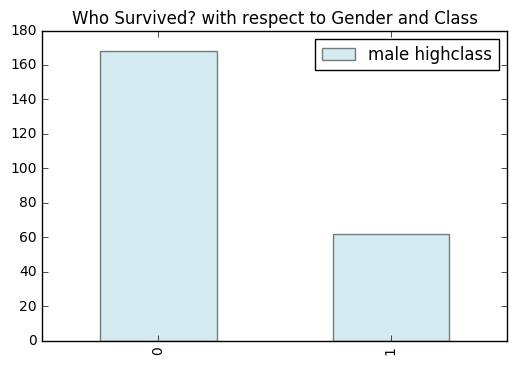

In [261]:
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male highclass', color='lightblue', alpha=0.5)
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

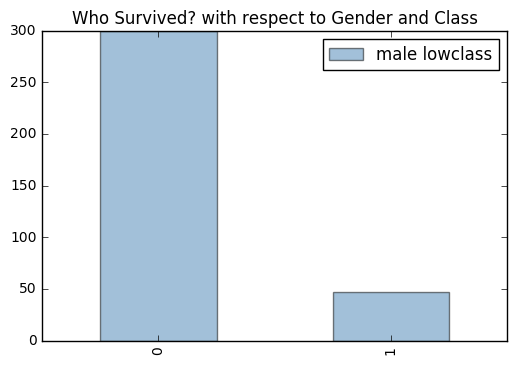

In [262]:
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_highclass.plot(kind='bar', label='male lowclass', color='steelblue', alpha=0.5)
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

### Conclusion

#### Age & Survivals

- For the survived people group, they have more people in the middle ages (from 20-40) and less teenager and children (from 0-20) compared with the died people group.

- For the died people group, they have more seniors in the outliers, but its average age is lower than that in the survived people group.

Conclusion: People in the middle ages have a higher survival rate.

#### Class & Survivals 

- More people survived in the first and second class, and less people survived in the third class.
- People in the first class are much elder compared to the people in the other class.

Conclusion: People in the first class of Titanix has bigger survival chance.

#### Gender & Survivals
- Women got higher survival chances in Titanic shipwreck, especially the women in the first class.
- Female in the low class got 50% chance to survive.
- Male were hardly to survive in that Titanic sinking, especially in the low class.

Conclusion: Female, especially the women in the high class had a higher survival chance.